In [73]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
dataset = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Users\Vinosh\AppData\Local\Temp\ipykernel_8196\1424208058.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


In [75]:
dataset

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"


# 1. Understand the dataset:

1. Identify the shape of the dataset

2. Identify variables with null values

### 1) 1) Identify the shape of the dataset

In [76]:
dataset.shape

(364558, 53)

### 1) 2) Identify variables with null values

In [77]:
dataset.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [78]:
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

# 2. Perform basic data exploratory analysis:

1. Utilize missing value treatment

2. Analyze the date column and remove the entries if it has an incorrect timeline

3. Draw a frequency plot for city-wise complaints

4. Draw scatter and hexbin plots for complaint concentration across Brooklyn

### 2) 1) Utilize missing value treatment

In [79]:
service_dataset = dataset.drop(['School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Intersection Street 1','Intersection Street 2','Landmark','Park Facility Name','School Name', 'School Number', 'School Region', 'School Code','School Phone Number', 'School Address', 'School City', 'School State','School Zip','School Not Found'],axis=1)

In [80]:
service_dataset.shape

(364558, 28)

In [81]:
service_dataset.isnull().sum()

Unique Key                            0
Created Date                          0
Closed Date                        2381
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                         6501
Location Type                       133
Incident Zip                       2998
Incident Address                  51699
Street Name                       51699
Cross Street 1                    57188
Cross Street 2                    57805
Address Type                       3252
City                               2997
Facility Type                      2389
Status                                0
Due Date                              3
Resolution Description                0
Resolution Action Updated Date     2402
Community Board                       0
Borough                               0
X Coordinate (State Plane)         4030
Y Coordinate (State Plane)         4030
Park Borough                          0


In [82]:
service_dataset

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,The Police Department responded to the complai...,01/01/2015 10:22:31 AM,09 QUEENS,QUEENS,1022809.0,192567.0,QUEENS,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,The Police Department responded to the complai...,01/01/2015 02:25:02 AM,07 BRONX,BRONX,1009923.0,255465.0,BRONX,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,The Police Department responded to the complai...,01/01/2015 12:20:33 AM,09 MANHATTAN,MANHATTAN,997847.0,238629.0,MANHATTAN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,The Police Department responded and upon arriv...,01/01/2015 02:42:22 AM,12 BRONX,BRONX,1024816.0,262237.0,BRONX,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"


In [83]:
service_dataset.dropna(inplace=True)

In [84]:
service_dataset.isnull().sum()

Unique Key                        0
Created Date                      0
Closed Date                       0
Agency                            0
Agency Name                       0
Complaint Type                    0
Descriptor                        0
Location Type                     0
Incident Zip                      0
Incident Address                  0
Street Name                       0
Cross Street 1                    0
Cross Street 2                    0
Address Type                      0
City                              0
Facility Type                     0
Status                            0
Due Date                          0
Resolution Description            0
Resolution Action Updated Date    0
Community Board                   0
Borough                           0
X Coordinate (State Plane)        0
Y Coordinate (State Plane)        0
Park Borough                      0
Latitude                          0
Longitude                         0
Location                    

In [121]:
service_dataset.shape

(300932, 29)

### 2) 2) Analyze the date column and remove the entries if it has an incorrect timeline

In [85]:
service_dataset['Created Date']

0         12/31/2015 11:59:45 PM
1         12/31/2015 11:59:44 PM
2         12/31/2015 11:59:29 PM
3         12/31/2015 11:57:46 PM
4         12/31/2015 11:56:58 PM
                   ...          
364553    01/01/2015 12:04:44 AM
364554    01/01/2015 12:04:28 AM
364555    01/01/2015 12:01:30 AM
364556    01/01/2015 12:01:29 AM
364557    01/01/2015 12:00:50 AM
Name: Created Date, Length: 300932, dtype: object

In [86]:
service_dataset['Created Date'] = pd.to_datetime(service_dataset['Created Date'])
service_dataset['Closed Date'] = pd.to_datetime(service_dataset['Closed Date'])

In [87]:
service_dataset.loc[service_dataset['Created Date']>=service_dataset['Closed Date']].shape

(0, 28)

In [88]:
service_dataset = service_dataset[service_dataset['Closed Date'].notnull()]

### 2) 3) Draw a frequency plot for city-wise complaints

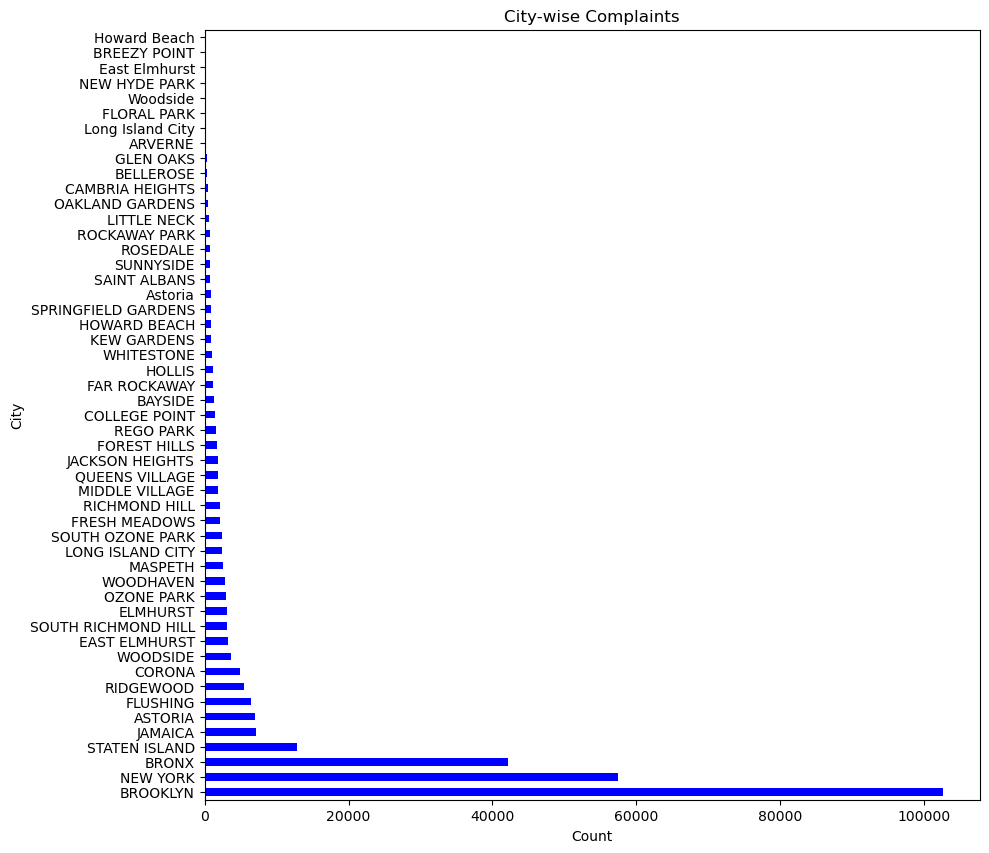

In [89]:
plt.figure(figsize=(10,10))
service_dataset['City'].value_counts().plot(kind='barh',color='b')
plt.xlabel('Count')
plt.ylabel('City')
plt.title('City-wise Complaints')
plt.show()

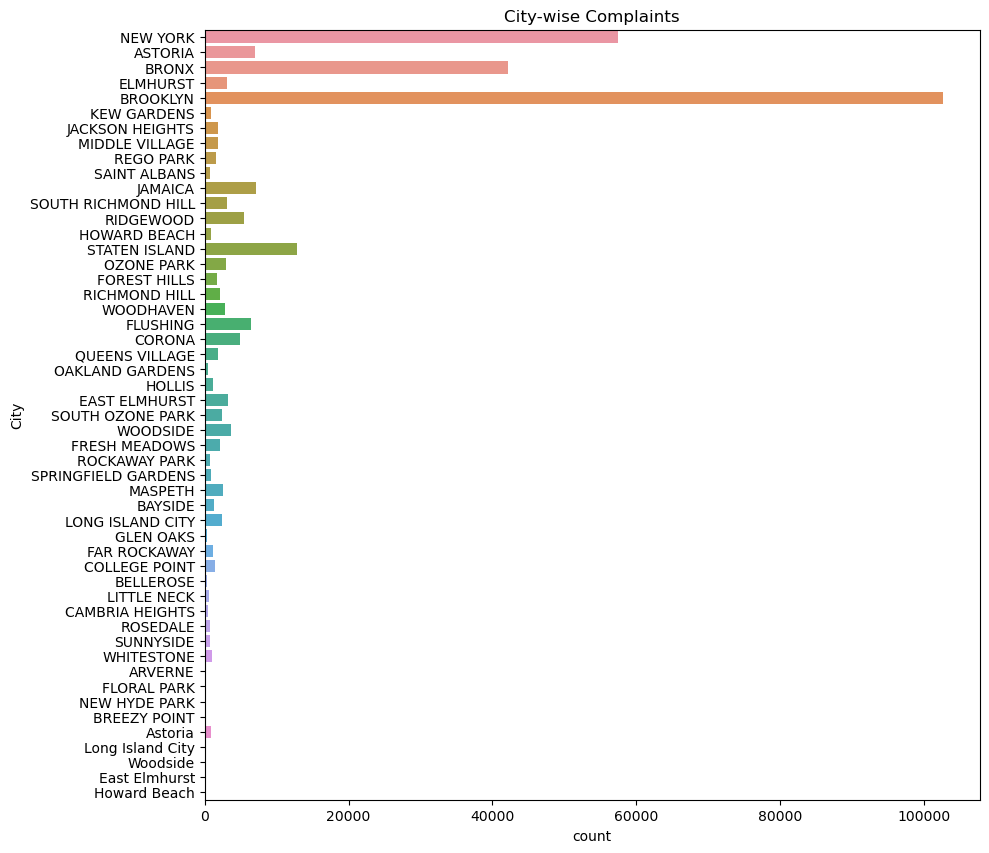

In [90]:
plt.figure(figsize=(10,10))
sns.countplot(y=service_dataset['City'])
plt.title('City-wise Complaints')
plt.show()

### 2) 4) Draw scatter and hexbin plots for complaint concentration across Brooklyn

In [91]:
def to_title(city):
    try:
        city = city.title()
        return city
    except:
        return np.nan

service_dataset['City'] = service_dataset['City'].apply(to_title)
service_dataset['City'].value_counts()

Brooklyn               102568
New York                57393
Bronx                   42117
Staten Island           12873
Astoria                  7927
Jamaica                  7080
Flushing                 6498
Ridgewood                5456
Corona                   4946
Woodside                 3824
East Elmhurst            3213
South Richmond Hill      3156
Elmhurst                 3089
Ozone Park               3025
Woodhaven                2819
Long Island City         2611
Maspeth                  2514
South Ozone Park         2346
Fresh Meadows            2128
Richmond Hill            2107
Middle Village           1909
Queens Village           1837
Jackson Heights          1810
Forest Hills             1668
Rego Park                1537
College Point            1379
Bayside                  1254
Far Rockaway             1107
Hollis                   1099
Whitestone               1072
Kew Gardens               914
Howard Beach              907
Springfield Gardens       904
Saint Alba

In [92]:
service_dataset.groupby(['City','Complaint Type']).size()

City      Complaint Type         
Arverne   Animal Abuse                45
          Blocked Driveway            49
          Derelict Vehicle            25
          Disorderly Youth             1
          Graffiti                     1
                                    ... 
Woodside  Noise - Park                11
          Noise - Street/Sidewalk    236
          Noise - Vehicle            108
          Traffic                     12
          Vending                      7
Length: 567, dtype: int64

In [93]:
brooklyn = service_dataset.loc[service_dataset['City']=='Brooklyn']

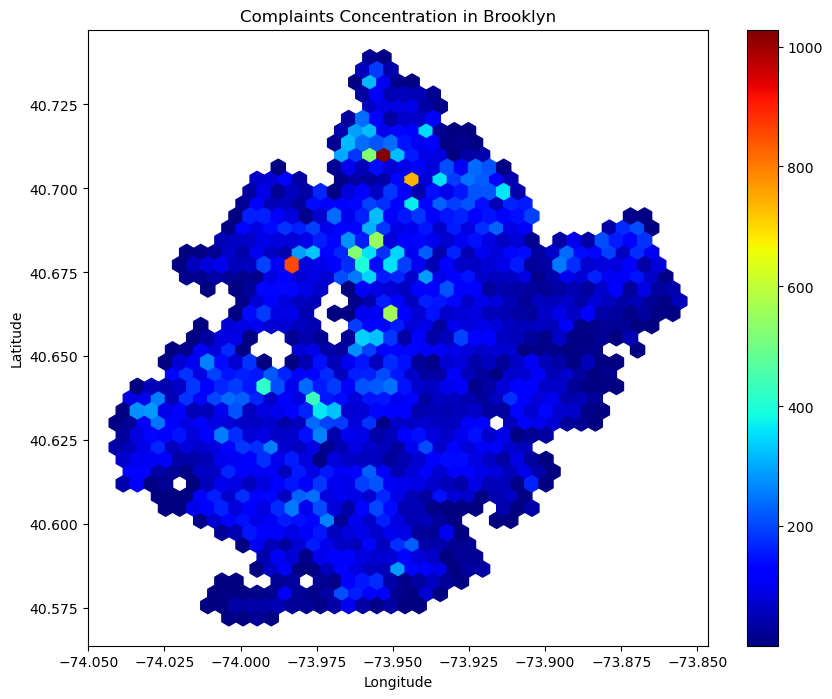

In [94]:
brooklyn[['Longitude', 'Latitude']].plot(kind = 'hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet', mincnt=1, title = 'Complaints Concentration in Brooklyn', figsize = (10, 8));

# 3. Find major types of complaints:

1. Plot a bar graph of count vs. complaint types

2. Find the top 10 types of complaints

3. Display the types of complaints in each city in a separate dataset

### 3) 1) Plot a bar graph of count vs. complaint types

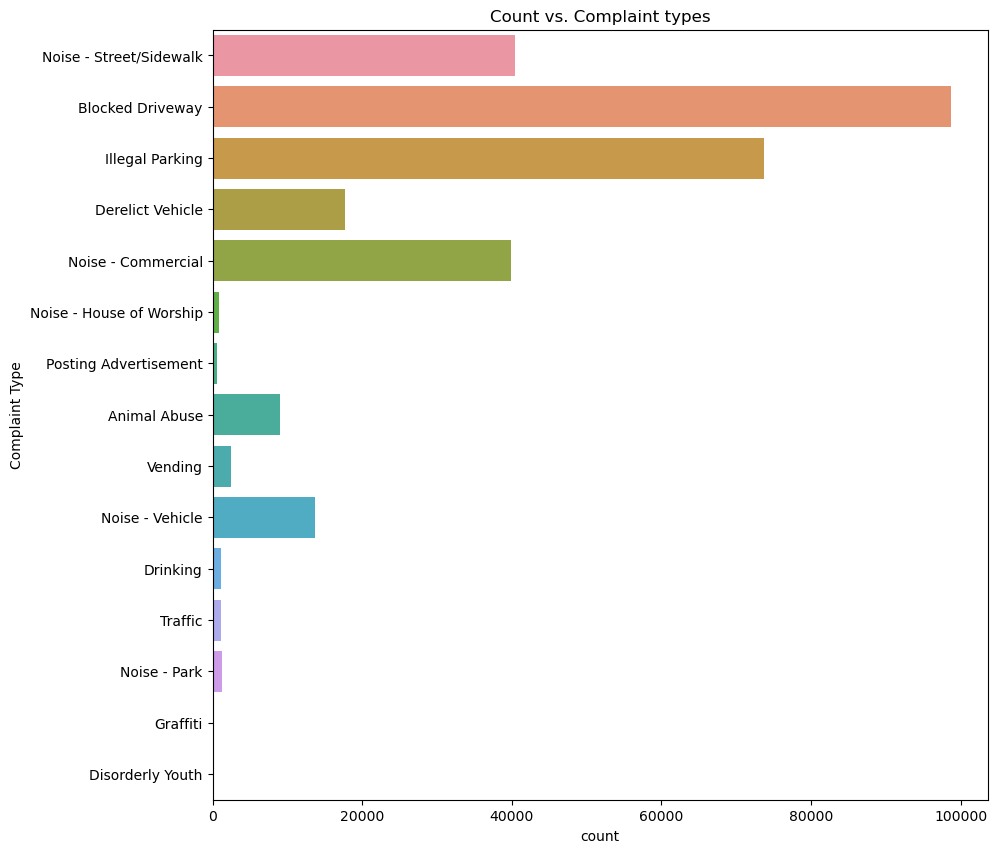

In [95]:
plt.figure(figsize=(10,10))
sns.countplot(y=service_dataset['Complaint Type'])
plt.title('Count vs. Complaint types')
plt.show()

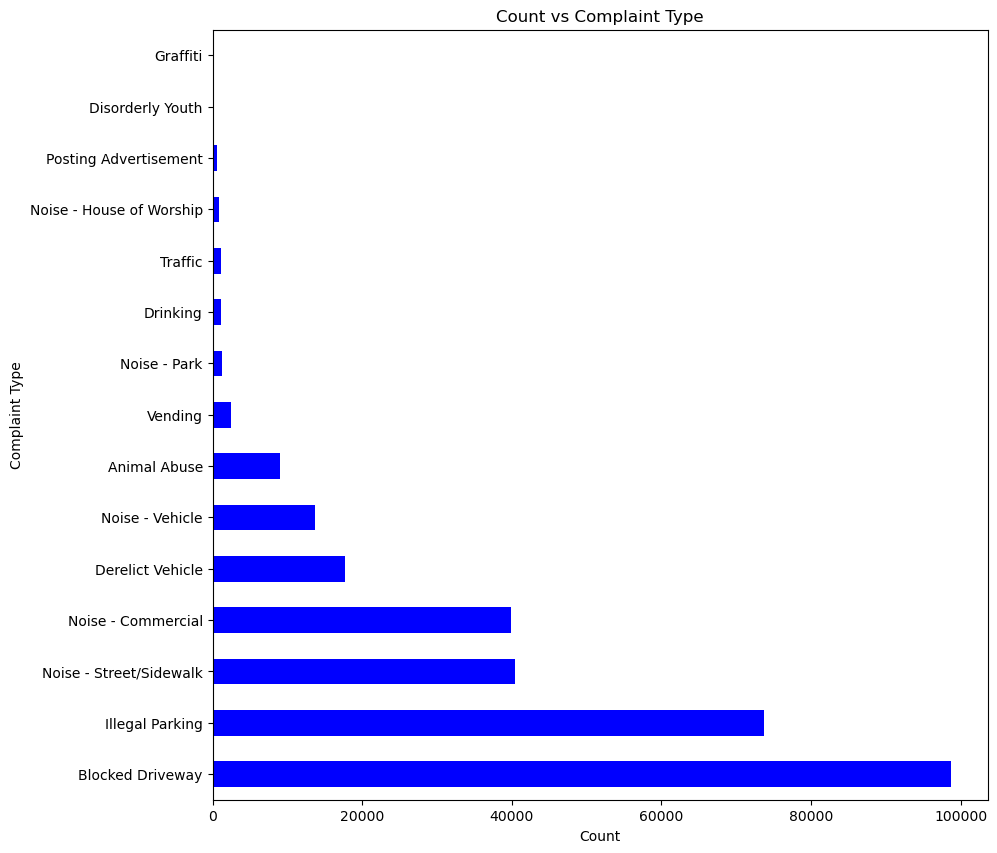

In [96]:
plt.figure(figsize=(10,10))
service_dataset['Complaint Type'].value_counts().plot(kind='barh',color='b')
plt.xlabel('Count')
plt.ylabel('Complaint Type')
plt.title('Count vs Complaint Type')
plt.show()

### 3) 2) Find the top 10 types of complaints

In [97]:
dfTop10=service_dataset.groupby('Complaint Type').size().sort_values(ascending=False)[:10]

In [98]:
dfTop10

Complaint Type
Blocked Driveway           98668
Illegal Parking            73719
Noise - Street/Sidewalk    40444
Noise - Commercial         39919
Derelict Vehicle           17706
Noise - Vehicle            13763
Animal Abuse                8968
Vending                     2451
Noise - Park                1289
Drinking                    1124
dtype: int64

### 3) 3) Display the types of complaints in each city in a separate dataset

In [99]:
service_dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Borough', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [100]:
dfcomplaint = service_dataset.drop(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Borough', 'Latitude', 'Longitude',
       'Location'],axis=1)

In [101]:
dfcomplaint

,Complaint Type,City
0,Noise - Street/Sidewalk,New York
1,Blocked Driveway,Astoria
2,Blocked Driveway,Bronx
3,Illegal Parking,Bronx
4,Illegal Parking,Elmhurst
...,...,...
364553,Illegal Parking,Woodhaven
364554,Noise - Vehicle,Bronx
364555,Noise - Street/Sidewalk,New York
364556,Blocked Driveway,Bronx


In [102]:
dfcomplaint.to_csv('Types of Complaints')

# 4. Visualize the major types of complaints in each city

In [103]:
service_dataset.groupby(['City','Complaint Type']).size()

City      Complaint Type         
Arverne   Animal Abuse                45
          Blocked Driveway            49
          Derelict Vehicle            25
          Disorderly Youth             1
          Graffiti                     1
                                    ... 
Woodside  Noise - Park                11
          Noise - Street/Sidewalk    236
          Noise - Vehicle            108
          Traffic                     12
          Vending                      7
Length: 567, dtype: int64

In [104]:
# pivot table
crosstab=pd.crosstab(index=service_dataset['City'],columns=service_dataset['Complaint Type'])
crosstab

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Posting Advertisement,Traffic,Vending
City,,,,,,,,,,,,,,,
Arverne,45,49,25,1,0,1,47,2,13,0,18,6,0,0,1
Astoria,149,3531,359,4,33,4,1373,1788,17,27,443,148,2,17,32
Bayside,48,506,181,1,1,3,453,35,2,1,5,16,0,2,0
Bellerose,13,137,82,2,1,0,98,37,1,0,9,7,0,3,0
Breezy Point,2,3,3,0,1,0,14,4,0,0,1,1,0,0,0
Bronx,1742,16789,1960,50,168,13,7867,2611,61,214,7584,2679,13,85,281
Brooklyn,2845,35891,5342,60,235,54,28309,12769,257,454,11200,4491,49,313,299
Cambria Heights,11,177,110,0,0,0,71,13,2,0,20,94,0,2,0
College Point,31,587,198,0,1,2,376,24,2,0,21,135,0,1,1


<AxesSubplot:xlabel='City'>

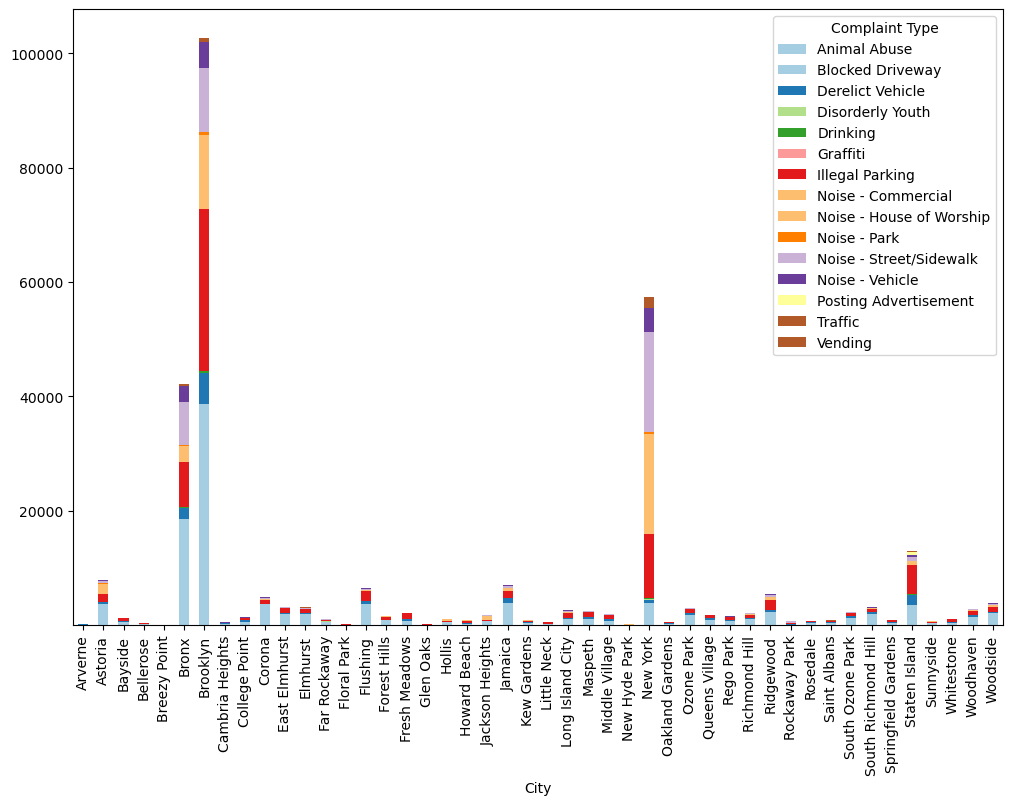

In [105]:
crosstab.plot(kind='bar',figsize=(12,8),stacked=True,colormap='Paired')

# 5. Check if the average response time across various types of complaints

In [106]:
service_dataset["Request_Closing_Time"]=(service_dataset["Closed Date"]-service_dataset["Created Date"])

Request_Closing_Time=[]
for x in (service_dataset["Closed Date"]-service_dataset["Created Date"]):
    close=x.total_seconds()/60
    Request_Closing_Time.append(close)
    
service_dataset["Request_Closing_Time"]=Request_Closing_Time

In [107]:
pd.DataFrame(service_dataset.groupby("Location Type")["Request_Closing_Time"].mean()).sort_values("Request_Closing_Time")

,Request_Closing_Time
Location Type,
Highway,118.261111
Club/Bar/Restaurant,183.121128
Store/Commercial,188.681364
Subway Station,192.109524
House of Worship,195.050892
Park/Playground,210.367193
Commercial,229.288000
Street/Sidewalk,263.398204
Residential Building,275.251621


# 6. Identify significant variables by performing a statistical analysis using p-values and chi-square values

In [108]:
from scipy import stats
from scipy.stats import chi2_contingency 

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [109]:
service_dataset.shape

(300932, 29)

In [110]:
new_df=service_dataset.loc[:,(service_dataset.isnull().sum()/service_dataset.shape[0]*100)<=50]

In [111]:
rem=[]
for x in new_df.columns.tolist():
    if new_df[x].nunique()<=3:
        print(x+ " "*10+" : ",new_df[x].unique())
        rem.append(x)

Agency           :  ['NYPD']
Agency Name           :  ['New York City Police Department']
Address Type           :  ['ADDRESS' 'BLOCKFACE' 'INTERSECTION']
Facility Type           :  ['Precinct']
Status           :  ['Closed']


In [112]:
new_df.shape

(300932, 29)

In [113]:
rem1=["Unique Key","Incident Address","Descriptor","Street Name","Cross Street 1","Cross Street 2","Due Date","Resolution Description","Resolution Action Updated Date","Community Board","X Coordinate (State Plane)","Y Coordinate (State Plane)","Park Borough","Latitude","Longitude","Location"]

new_df.drop(rem1,axis=1,inplace=True)

In [114]:
new_df.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Location Type,Incident Zip,Address Type,City,Facility Type,Status,Borough,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Street/Sidewalk,10034.0,ADDRESS,New York,Precinct,Closed,MANHATTAN,55.500000
1,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,Street/Sidewalk,11105.0,ADDRESS,Astoria,Precinct,Closed,QUEENS,87.216667
2,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,Street/Sidewalk,10458.0,ADDRESS,Bronx,Precinct,Closed,BRONX,291.566667
3,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Street/Sidewalk,10461.0,ADDRESS,Bronx,Precinct,Closed,BRONX,465.450000
4,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Street/Sidewalk,11373.0,ADDRESS,Elmhurst,Precinct,Closed,QUEENS,207.733333


(0.0, 2000.0)

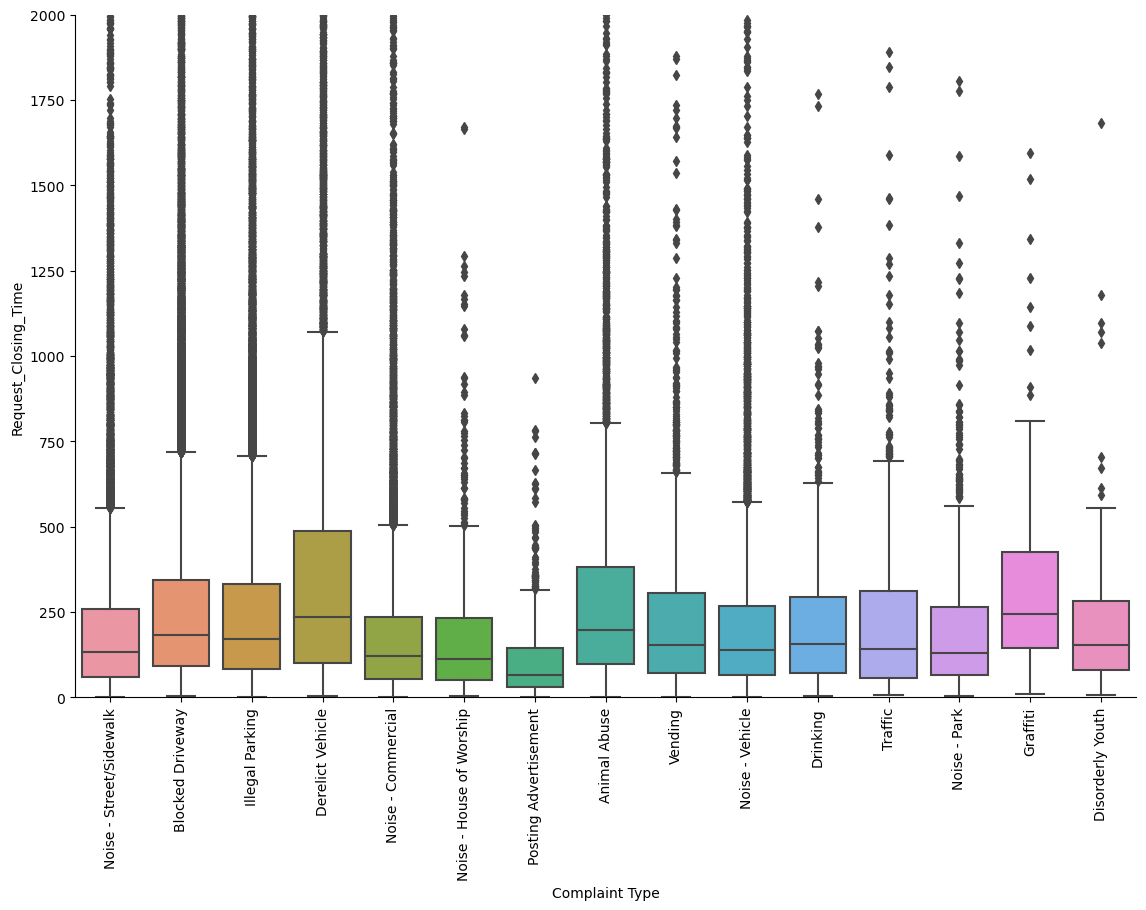

In [115]:
g=sns.catplot(x="Complaint Type",y="Request_Closing_Time",kind="box",data=new_df)
g.fig.set_figheight(8)
g.fig.set_figwidth(15)
plt.xticks(rotation=90)
plt.ylim((0,2000))

#### H0: there is no significant different in mean of Request_Closing_Time for different Complaint
#### H1:there is signficant different in mean of Request_Closing_Time for different Complaint

In [116]:
anova_df=pd.DataFrame()
anova_df["Request_Closing_Time"]=new_df["Request_Closing_Time"]
anova_df["Complaint"]=new_df["Complaint Type"]

anova_df.dropna(inplace=True)
anova_df.head()

,Request_Closing_Time,Complaint
0,55.500000,Noise - Street/Sidewalk
1,87.216667,Blocked Driveway
2,291.566667,Blocked Driveway
3,465.450000,Illegal Parking
4,207.733333,Illegal Parking


In [117]:
lm=ols("Request_Closing_Time~Complaint",data=anova_df).fit()
table=sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Complaint,14.0,8.501602e+08,6.072573e+07,525.961595,0.0
Residual,300917.0,3.474285e+10,1.154566e+05,NaN,NaN


#### Since p value for the Complaint is less that 0.01 thus we accept alternate hypothesis

#### H0:Complaint Type and Location Type are independent
#### H1:Complaint Type and Location Type are related

In [118]:
chi_sq=pd.DataFrame()
chi_sq["Location Type"]=new_df["Location Type"]
chi_sq["Complaint Type"]=new_df["Complaint Type"]

chi_sq.dropna(inplace=True)

In [119]:
data_crosstab = pd.crosstab( chi_sq["Location Type"],chi_sq["Complaint Type"])

In [120]:
stat, p, dof, expected = chi2_contingency(data_crosstab) 

alpha = 0.05
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)')

Dependent (reject H0)


#### Since p value for the chi square test is less than 0.05(LOS) we can conclude that Complaint Type is dependent on Location Type